# [Computational Social Science] 
## 1-4 Statistics and Computation Refresher - Solutions

This notebook will review some basic statistical and computational concepts. We assume knowledge of Python up to the level of D-Lab's [Python Fundamentals](https://github.com/dlab-berkeley/python-fundamentals) workshop. If the materials here are challenging, be sure to review them and the Fundamentals materials, and ask for help from the instructors early and often!

In [77]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1234)

## Load Data

Throughout this course, we will make extensive use of [pandas dataframes](https://pandas.pydata.org/). Getting comfortable with pandas will be important as this will be the primary tool you use to load, manipulate, and combine datasets. For this lab, we will use a dataset builtin to the [statisticalmodels](https://www.statsmodels.org/stable/index.html) library. Run the following code to load the dataset.

In [80]:
anes96 = sm.datasets.anes96
dataset_anes96 = anes96.load_pandas()
df_anes96 = dataset_anes96.data

## Basic Pandas Operations

Let's run through some basic pandas operations. These methods are not an exhaustive treatment of everything pandas can do, but should provide a good refresher on some of the basics. First, try to get the first 5 rows of a pandas frame and display them in the notebook.

Next, return the first 10 rows, and then return the last 10 rows.

In [81]:
# First 10 rows
df_anes96.head(10)

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,0.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,0.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,0.0,6.461624
5,110.0,3.0,3.0,4.0,6.0,1.0,21.0,4.0,1.0,0.0,4.701389
6,100.0,7.0,5.0,6.0,4.0,1.0,77.0,4.0,1.0,0.0,4.606170
7,31.0,1.0,5.0,4.0,5.0,4.0,21.0,4.0,1.0,0.0,3.437208
8,180.0,7.0,4.0,6.0,3.0,3.0,31.0,4.0,1.0,0.0,5.193512
9,2800.0,0.0,3.0,3.0,7.0,0.0,39.0,3.0,1.0,0.0,7.937410


In [82]:
# Last 10 rows
df_anes96.tail(10)

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
934,1600.0,7.0,4.0,2.0,5.0,6.0,56.0,7.0,24.0,1.0,7.377821
935,0.0,7.0,6.0,3.0,6.0,6.0,55.0,7.0,24.0,1.0,-2.302585
936,0.0,7.0,6.0,2.0,6.0,6.0,41.0,4.0,24.0,1.0,-2.302585
937,7300.0,1.0,2.0,3.0,6.0,0.0,43.0,7.0,24.0,0.0,8.895643
938,16.0,7.0,7.0,1.0,7.0,6.0,34.0,3.0,24.0,1.0,2.778819
939,0.0,7.0,7.0,1.0,6.0,4.0,73.0,6.0,24.0,1.0,-2.302585
940,0.0,7.0,5.0,2.0,6.0,6.0,50.0,6.0,24.0,1.0,-2.302585
941,0.0,3.0,6.0,2.0,7.0,5.0,43.0,6.0,24.0,1.0,-2.302585
942,0.0,6.0,6.0,2.0,5.0,6.0,46.0,7.0,24.0,1.0,-2.302585
943,18.0,7.0,4.0,2.0,6.0,3.0,61.0,7.0,24.0,1.0,2.895912


We can see the total number of rows and columns by using a dataframe's "shape" attribute:

In [83]:
df_anes96.shape

(944, 11)

Next, check out the data types across all of the columns.

In [84]:
df_anes96.dtypes

popul       float64
TVnews      float64
selfLR      float64
ClinLR      float64
DoleLR      float64
PID         float64
age         float64
educ        float64
income      float64
vote        float64
logpopul    float64
dtype: object

Now try using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to see some summary statistics for each column in the dataframe.

In [85]:
df_anes96.describe()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,logpopul
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314,2.472307
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208,3.187043
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000,-2.302585
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000,0.095310
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000,3.095578
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000,4.701389
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000,8.895643


**Question**: What can you gather from these explorations? What are the data types for all of the columns? Do these data types really make sense?

**Answer**: All of the data types are floats, but these are not necessarily meaningful. Something like "age" makes sense as a float, but some of the variables like "TVnews" seem to be categorical.

## Renaming, Indexing, and Slicing

Now let's practice with manipulating dataframes. Renaming columns and pulling particular rows and columns are useful methods for working with dataframes.

**Challenge**: Use the [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) method to change a column name. For example, try renaming "educ" to "education."

In [86]:
df_anes96 = df_anes96.rename(columns = {'educ': 'education'})
df_anes96.head()

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,education,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,0.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,0.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,0.0,6.461624


The .rename() method allows you to modify index labels and/or column names. As you can see, we passed a dict to the columns parameter, with the original name as the key and the new name as the value. Importantly, we also set the inplace parameter to True, which modifies the actual DataFrame, not a copy of it.

Next, let's take a look at slicing dataframes. Before we used the .head() and .tail() method to get the first n or last n rows of a dataframe. Instead, use the [] operator to return the first 5 rows.

In [87]:
df_anes96[:5]

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,education,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,0.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,0.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,0.0,6.461624


There are a few other methods that we can use to index data too. In particular, let's use the [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) method. First, let's make a sample dataframe (credit to [Chris Fonnesbeck's tutorial](https://github.com/fonnesbeck/scipy2015_tutorial) for this example).

In [88]:
bacteria = pd.DataFrame({'bacteria_counts': [632, 1638, 569, 115],
                        'other_feature': [438, 833, 234, 298]},
                       index = ['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

Note that to create the dataframe we first passed in a dictionary to create the columns and values, and then separately passed in a list for the index that corresponds to the taxon for each bacterium. Let's take a look at what the dataset looks like.

In [89]:
bacteria

,bacteria_counts,other_feature
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


**Challenge**: Now, use the loc method to look at the row associated with "Actinobacteria".

In [90]:
bacteria.loc['Actinobacteria']

bacteria_counts    569
other_feature      234
Name: Actinobacteria, dtype: int64

**Challenge**: Next, let's look at the [.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) method. Using our original df_anes96 dataframe, try using .iloc to get the 2nd, 6th, 7th, and 10th rows. **Hint**: Remember, what number does Python start its indexes with?

In [91]:
df_anes96.iloc[[1, 5, 6, 9]]

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,education,income,vote,logpopul
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
5,110.0,3.0,3.0,4.0,6.0,1.0,21.0,4.0,1.0,0.0,4.701389
6,100.0,7.0,5.0,6.0,4.0,1.0,77.0,4.0,1.0,0.0,4.606170
9,2800.0,0.0,3.0,3.0,7.0,0.0,39.0,3.0,1.0,0.0,7.937410


**Challenge**: Now try to use `.iloc` to select every 5 rows between the 25th index and 50th index. **Hint**: Try looking at how to [slice and stride](https://towardsdatascience.com/indexing-best-practices-in-pandas-series-e455c7d2417) in Python.

In [92]:
df_anes96.iloc[25:50:5]

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,education,income,vote,logpopul
25,0.0,2.0,4.0,3.0,6.0,1.0,21.0,4.0,2.0,0.0,-2.302585
30,350.0,0.0,3.0,4.0,7.0,2.0,26.0,2.0,2.0,0.0,5.858219
35,0.0,7.0,3.0,4.0,6.0,0.0,57.0,3.0,3.0,0.0,-2.302585
40,180.0,6.0,5.0,5.0,5.0,0.0,51.0,2.0,3.0,0.0,5.193512
45,11.0,3.0,6.0,6.0,3.0,2.0,76.0,6.0,3.0,0.0,2.406945


## Calculations

Next, let's look at some common calculations you might make with real-life datasets. First, try to use the [`.unique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) to find the unique values in TVnews. What do you find?

In [93]:
df_anes96['TVnews'].unique()

array([7., 1., 4., 3., 0., 5., 2., 6.])

**Answer**: TVnews is definitely discrete as it seems to vary from 0-7 by increments of 1.

How would we get the number of unique values? Try using [`.nunique()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) to find the number of unique values in TVnews!

In [94]:
df_anes96['TVnews'].nunique()

8

**Answer**: It looks like there are 8 unique values.

Next, try to find the [`.sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) of age and [`.mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) age in the df_anes96 dataset.

In [95]:
print('sum of age is', df_anes96['age'].sum())
print('mean of age is', df_anes96['age'].mean())

sum of age is 44409.0
mean of age is 47.043432203389834


Sometimes we want to explore certain relationships between two variables in our dataset. 

**Challenge**: Try to use the [`.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [`.sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) and [`.count()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html) methods to group the observations by education level, and calculate the proportion of the vote that went to Bob Dole by education level. 

**Hint**: In the vote feature, a "0" denotes a vote for Clinton and a "1" denotes a vote for Dole. Divide the `sum` of the vote by the `count` of the vote!

In [96]:
df_anes96.groupby('education')['vote'].sum() / df_anes96.groupby('education')['vote'].count()

education
1.0    0.230769
2.0    0.269231
3.0    0.383065
4.0    0.433155
5.0    0.411111
6.0    0.475771
7.0    0.433071
Name: vote, dtype: float64

## Visualization

Another key part of data science is using visualizations to explore your data and present results. Python provides several powerful tools for creating visualizations. In this course, we will mainly use [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/introduction.html#:~:text=Seaborn%20is%20a%20library%20for,examining%20relationships%20between%20multiple%20variables). Matplotlib is a popular visualization library, and seaborn is built on top of it and includes some integration with pandas. There are other options as well. For those of you coming from R, you might want to explore [ggplot](http://ggplot.yhathq.com/), [Bokeh](https://docs.bokeh.org/en/latest/), and [plotnine](https://plotnine.readthedocs.io/en/stable/), which are all built on top of the "grammar of graphics" that you might be familiar with.

Let's start with a simple histogram. Use the [`.hist()`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) method to plot a simple histogram for 'age' on top of the df_anes96 dataframe.

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

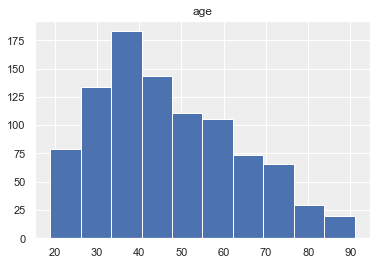

In [97]:
df_anes96.hist('age')

**Question**: Notice that the `.hist()` method has some additional arguments that you can supply beyond just the variable that is being plotted. Try using the bins argument to adjust the binwidths. What happens if you use 10? What about 1?

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

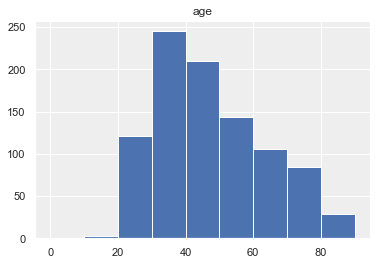

In [98]:
df_anes96.hist('age', bins = range(0, 100, 10))

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

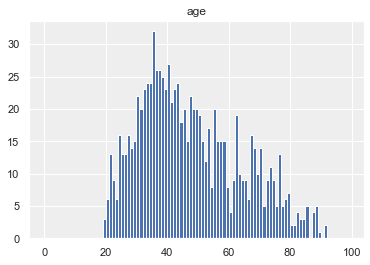

In [99]:
df_anes96.hist('age', bins = range(0, 100, 1))

**Answer**: The bin widths can change the shape of the histogram substantially. This is actually an example of bias-variance tradeoff, a concept that we will explore in depth later on. Fewer bins smooth the data, but at the cost of losing granularity. The choice of bin width is essentially a choice of how much granularity and smoothness to trade off when visualizing continuous data.

What if we want to add some info to the plot? Instead of calling `.hist()` directly on the pandas dataframe, try using plt.hist().

(array([ 79., 134., 183., 143., 111., 105.,  74.,  66.,  29.,  20.]),
 array([19. , 26.2, 33.4, 40.6, 47.8, 55. , 62.2, 69.4, 76.6, 83.8, 91. ]),
 <BarContainer object of 10 artists>)

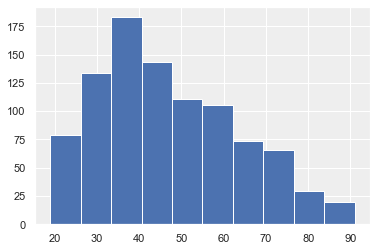

In [100]:
plt.hist(df_anes96['age'])

We can call functions in the plt module multiple times within a single cell and those functions will all work on, and modify, the current figure associated with the current cell. This is because pyplot (or plt) keeps an internal variable for the current figure which is unique to each cell plt is used in. Try adding a [`title`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html), [`xlabel`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html), and [`ylabel`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html) to the histogram.

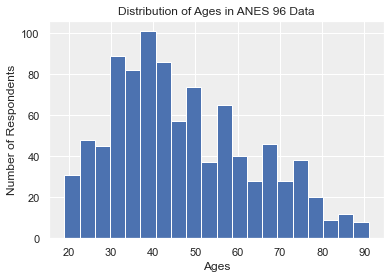

In [101]:
plt.title('Distribution of Ages in ANES 96 Data')
plt.xlabel('Ages')
plt.hist(df_anes96['age'], bins=20);
plt.ylabel('Number of Respondents');

### Barplot

Now try it yourself! Instead of a histogram, let's make a bar plot using matplotlib's [`.bar()`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.bar.html) method.

**Question**: What kind of data is a bar plot good for visualizing? How is this different from a histogram?

**Answer**: Bar plots are good for visualizing categorical data, while histograms are good for continuous data.

Make a bar plot that visualizes the votes that Bob Dole received in this sample, broken down by education level. You will need to manipulate the dataframe to get the vote counts by education level, then plot using the `.bar()` method. Also be sure to recode the numerical values in "education" to their corresponding text values. Consult the [dataset documentation](https://www.statsmodels.org/stable/datasets/generated/anes96.html). **Hint**: Consider using `groupby()`, `count()`, and `replace()` to get the data into the correct shape before plotting.

In [102]:
educ_vote_counts = df_anes96.groupby('education', as_index=False)['vote'].count()
educ_vote_counts


,education,vote
0,1.0,13
1,2.0,52
2,3.0,248
3,4.0,187
4,5.0,90
5,6.0,227
6,7.0,127


In [103]:
df_anes96

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,education,income,vote,logpopul
0,0.0,7.0,7.0,1.0,6.0,6.0,36.0,3.0,1.0,1.0,-2.302585
1,190.0,1.0,3.0,3.0,5.0,1.0,20.0,4.0,1.0,0.0,5.247550
2,31.0,7.0,2.0,2.0,6.0,1.0,24.0,6.0,1.0,0.0,3.437208
3,83.0,4.0,3.0,4.0,5.0,1.0,28.0,6.0,1.0,0.0,4.420045
4,640.0,7.0,5.0,6.0,4.0,0.0,68.0,6.0,1.0,0.0,6.461624
...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,7.0,7.0,1.0,6.0,4.0,73.0,6.0,24.0,1.0,-2.302585
940,0.0,7.0,5.0,2.0,6.0,6.0,50.0,6.0,24.0,1.0,-2.302585
941,0.0,3.0,6.0,2.0,7.0,5.0,43.0,6.0,24.0,1.0,-2.302585
942,0.0,6.0,6.0,2.0,5.0,6.0,46.0,7.0,24.0,1.0,-2.302585


In [104]:
df_anes96.groupby('education',as_index=False)['vote'].count()



,education,vote
0,1.0,13
1,2.0,52
2,3.0,248
3,4.0,187
4,5.0,90
5,6.0,227
6,7.0,127


In [105]:
# Shape the data
educ_vote_counts = df_anes96.groupby('education', as_index=False)['vote'].count()
educ_vote_counts = educ_vote_counts.replace([1, 2, 3, 4, 5, 6, 7],
                                           ['grade school', 'Some high school', 'High school graduate',
                                            'Some college', 'College degree', 'Masters degree', 'PhD'])

In [106]:
educ_vote_counts

,education,vote
0,grade school,13
1,Some high school,52
2,High school graduate,248
3,Some college,187
4,College degree,90
5,Masters degree,227
6,PhD,127


Next, use your new dataset to make a barplot. Be sure to add [`.xtick()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) labels to label the categories.

In [107]:
x = range(len(educ_vote_counts['education']))
x

range(0, 7)

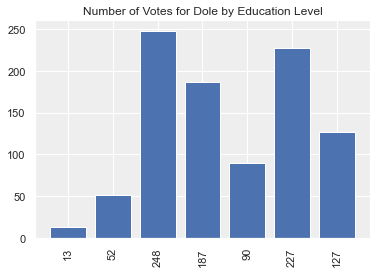

In [127]:
## Plot
x = educ_vote_counts['education']
y = educ_vote_counts['vote']

plt.bar(x, y)

plt.title('Number of Votes for Dole by Education Level')
plt.xticks(x, y, rotation = 90)
plt.show()

## Plotting with Seaborn

"`Seaborn` is a Python visualization library based on `Matplotlib`. It provides a high-level interface for drawing attractive statistical graphics."

Let's import it and give it the alias `sns`, which is done by convention.

In [111]:
import seaborn as sns
sns.set(rc={'axes.facecolor' : '#EEEEEE'})

The `sns.set()` function allows us to change some of the `rcParams`. Here, we're changing the plot's face color.

`seaborn` has the capacity to create a large number of informative, beautiful plots very easily. Here we'll review several types, but please visit their [gallery](https://seaborn.pydata.org/examples/index.html) for a more complete picture of all that you can do with `seaborn`.

Let's use the [U.S. Macroeconomics](https://www.statsmodels.org/dev/datasets/generated/macrodata.html) dataset, also from the `statsmodels` library. Load the data and explore it.

In [112]:
macro = sm.datasets.macrodata
dataset_macro = macro.load_pandas()
df_macro = dataset_macro.data

In [113]:
df_macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Now, use the `sns` library's [`.regplot()`](https://seaborn.pydata.org/generated/seaborn.regplot.html) method to visualize a regression of Real Gross Domestic Product (GDP) on Consumer Price Index (CPI). 

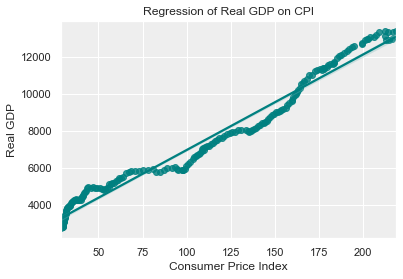

In [114]:
sns.regplot(x='cpi', y='realgdp', data=df_macro, color='teal')

plt.title('Regression of Real GDP on CPI')
plt.xlabel('Consumer Price Index')
plt.ylabel('Real GDP');

**Question**: How well does the regression fit the data? What can you conclude from this plot?

**Answer**: Real GDP tends to positively correlate with CPI. Note that at best we can say that CPI might be a good predictor of GDP, but cannot make a causal claim with this regression alone.

### Kernel Density Plots

Earlier, we used histograms to visualize continuous data. As we saw earlier, the choice of bin width is consequential for the shape of the histogram. Another option for visualizing the same data is [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation). KDE is a method for estimating the probability density distribution (pdf) of a random variable. Try using seaborn's [`.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to plot real GDP.

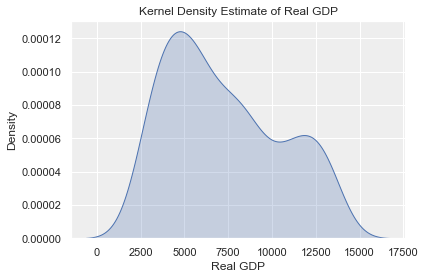

In [115]:
sns.kdeplot(df_macro['realgdp'], shade=True)

plt.title("Kernel Density Estimate of Real GDP")
plt.xlabel("Real GDP")
plt.ylabel("Density");

**Question**: What can you say about the distribution from this kernel density plot?

**Answer**: The data is slightly right skewed.

You can also overlay a kernel density plot on a histogram using [`.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html). Try using displot yourself here.

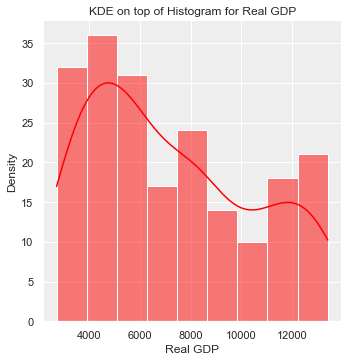

In [116]:
sns.displot(df_macro['realgdp'], color = "red", kind="hist", kde=True)
plt.title("KDE on top of Histogram for Real GDP")
plt.xlabel("Real GDP")
plt.ylabel("Density");

**Question**: What can you say about the KDE plot overlayed on the histogram?

**Answer**: The KDE and histogram have a lot of overlap, but the KDE smooths out the small spike at around 12,500 and has fatter tails.

### Joint Distribution

The last visualization technique we will look at is plotting a joint distribution. Use the [`.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) method to plot the joint distribution of unemployment and inflation. Note that .jointplot() returns a different type of object than the other plots we have worked with so titling it might be hard. Check out this answer on [stackoverflow](https://stackoverflow.com/questions/49065837/customize-the-axis-label-in-seaborn-jointplot) to see if you can figure it out!

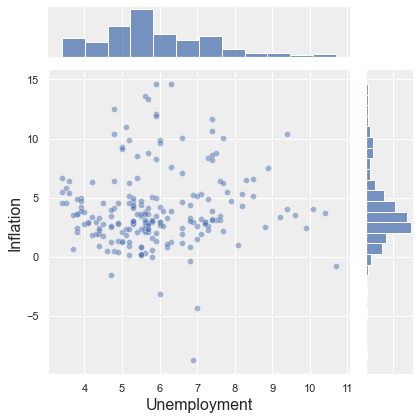

In [117]:
j_plot = sns.jointplot(x = 'unemp', y = 'infl', data = df_macro, alpha = .5)

# JointGrid has a convenience function
j_plot.set_axis_labels('Unemployment', 'Inflation', fontsize=16)

# or set labels via the axes objects
j_plot.ax_joint.set_xlabel('Unemployment')

# also possible to manipulate the histogram plots this way, e.g.
j_plot.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
plt.tight_layout();

**Question**: What can you say about the relationship between inflation and unemployment? Why are joint distributions interesting in general?

**Answer**: Inflation and unemployment do not seem to have a strong relationship. These types of plots are useful because the joint distributions of variables can help us understand how different features in our dataset are related to one another. Later in the semester we will learn techniques for dropping reundant variables, reducing multicollinearity, etc. so visualizing these relationships helps with our machine learning workflow.

## Simulations

One of the advantages of computational social science is that computing gives us the tools to create simulations. Traditional pedagogy in statistics emphasizes solving problems analytically, but oftentimes we can solve the same problems computationally. For now, let's explore the [bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#:~:text=Bootstrapping%20is%20any%20test%20or,etc.\)%20to%20sample%20estimates.) as a way to use simulations. A common problem in statistics is that we usually do not know the true parameters (mean, variance, etc.) of a population. Using the bootstrap, we can estimate these values. The basic procedure for the bootstrap is to do the following:

1. For a dataset of size n, take a resample **with replacement** of size n.
2. Calculate the quantity of interest (i.e. mean, median, etc.)
3. Repeat this procedure a large number of times (for example, 1000)
4. Visualize/analyze the distribution of the resampled quantity

Let's try it ourselves. First, let's see how many observations we have in our df_macro dataset. Use the `.size` property to find this information.



In [118]:
print(df_macro.size)  # this is the number of cells in the df 
print(df_macro.shape) # there are 203 rows in df_macro

2842
(203, 14)


Next, find the median for the real GDP quantity.

In [119]:
df_macro['realgdp'].median()

6559.594

Now, resample the dataframe with replacement and find the median of real GDP. 

In [120]:
resample = df_macro.sample(n=203, replace=True, random_state=1)

In [121]:
resample.duplicated().value_counts()

False    126
True      77
dtype: int64

In [122]:
resample['realgdp'].quantile(q=.5)

6197.468

**Question**: What is the resampled mean? Does the answer you got intuitively make sense?

**Answer**: 6197 is fairly close to the mean in the overall dataset. This makes sense since we resampled the whole dataset with replacement (i.e. duplicates).

Next, we write a function that takes a dataframe, column, and the number of replications as arguments and returns a number of resampled medians equal to the number of replications. Similar to the slice and stride we did to a pandas data frame above, the [`.arange()`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) method in numpy creates an array based on a range. We use `.arange()` below to specify how many simulations we want to do. *Note: we could use Python's `range` for this as well.*

In [123]:
def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.loc[:, label]
    medians = []
    for i in np.arange(replications): 
        bootstrap_sample = just_one_column.sample(n=just_one_column.size, replace=True)
        resampled_median = bootstrap_sample.quantile(.5)
        medians.append(resampled_median)

    return medians

Plot the medians from the realgdp column of our df_macro with a histogram, and add a line with the 95% confidence interval.

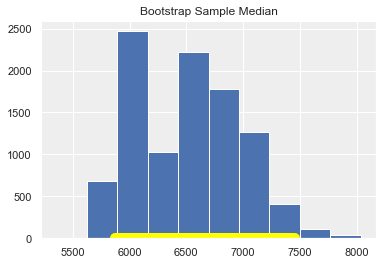

In [124]:
medians = bootstrap_median(df_macro, 'realgdp', 10000)
resampled_medians = pd.DataFrame(data={'Bootstrap Sample Median': medians})
resampled_medians.hist()

# This next line is quite long: have a look and see if you can see what's going on!
plt.plot(np.array([pd.Series(medians).quantile(q=.025), pd.Series(medians).quantile(q=.975)]), np.array([0, 0]), color='yellow', linewidth=10, zorder=1);

Now, we repeat this whole process 100 times to plot 100 confidence intervals.

In [125]:
left_ends = []
right_ends = []

for i in np.arange(100):
    first_sample = df_macro.sample(n=df_macro.shape[0], replace=True)
    medians = bootstrap_median(first_sample, 'realgdp', 1000)
    left_ends.append(pd.Series(medians).quantile(q=.025))
    right_ends.append(pd.Series(medians).quantile(q=.975))

intervals = pd.DataFrame(data={"Left": left_ends, "Right": right_ends})

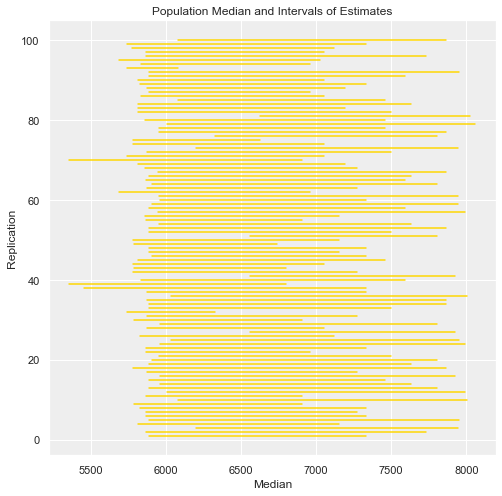

In [126]:
plt.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals.iloc[i, :]
    plt.plot(ends, np.array([i + 1, i + 1]), color='gold')
plt.xlabel('Median')
plt.ylabel('Replication')
plt.title('Population Median and Intervals of Estimates');

**Question**: What can you say about the distributions of the resampled medians? Why is this method useful? Did your code take a while to run, and if so what does this suggest?

**Answer**: The "true" median is around 6500, but there is some spread in the estimates. The distribution looks to be right skewed. These types of simulations are useful primarily because they can help us build intuition around statistical properties of our data. They can be a great way to learn more about probability, sampling, and machine learning through computation. The code did take some time to run, which does represent a general problem that we need to think about when working with big data. Models can sometimes take hours or even days/weeks to run so thinking about computational resources is important.

---
Notebook written by Aniket Kesari. Materials borrwed from D-Lab's [pandas](https://github.com/dlab-berkeley/introduction-to-pandas) and [data visualization](https://github.com/dlab-berkeley/visualization-with-python), and [Legal Studies 123: Data, Prediction, and Law](https://github.com/Akesari12/LS123_Data_Prediction_Law_Spring-2019/blob/master/labs/Probability%20Distributions%2C%20Bootstrap%2C%20and%20Confidence%20Intervals/Probability%2C%20Bootstrap%20and%20Confidence%20Intervals%20Solutions.ipynb).